In [172]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize']=(12.8, 7.2)
# 全局设置输出图片大小 1280 x 720 像素

In [173]:
def dtft(xn):
    N = len(xn)
    n = np.arange(N)
    
    def X(w):
        len_out = len(w)
        result = np.zeros(len_out,dtype='complex')
        for i in range(len_out):
            e_w = np.exp(-1j*w[i]*n)
            result[i] = np.dot(xn,e_w)
        return result
    return X

def draw_dtft(Xw,fs):
    x_scale = np.linspace(0,2*np.pi,10000)
    xf_scale = np.linspace(0,fs,10000)
    plt.plot(xf_scale,np.abs(Xw(x_scale)))

def draw_dft_abs(Xk,fs):
    Xk_abs = np.abs(Xk)
    N = len(Xk)
    xf_scale = np.linspace(0,fs,N)
    plt.stem(xf_scale,Xk_abs/np.max(Xk_abs))

def dtft_analysis(xn,fs):
    Xw = dtft(xn)
    draw_dtft(Xw,fs)

<StemContainer object of 3 artists>

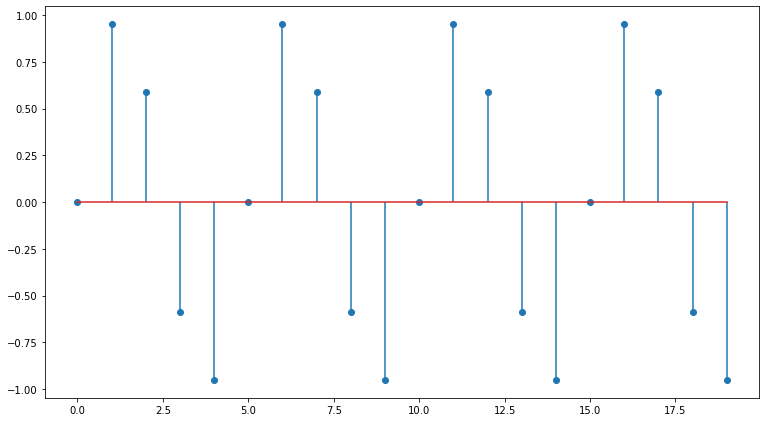

In [174]:
# x1原始抽样序列

f0 = 2_000
fs = 10_000

seq = np.arange(20)
x1 = np.sin(2*np.pi*f0*seq*(1/fs))
plt.stem(x1)

In [175]:
def dft(x):
    N = len(x)
    n = np.arange(N)  #  n in 0, 1, ..., N-1
    
    Xk = np.zeros(N,dtype='complex')
    for k in range(N):
        w = np.exp(-2j * np.pi * n * k /N)
        Xk[k] = np.dot(x,w)
    return Xk

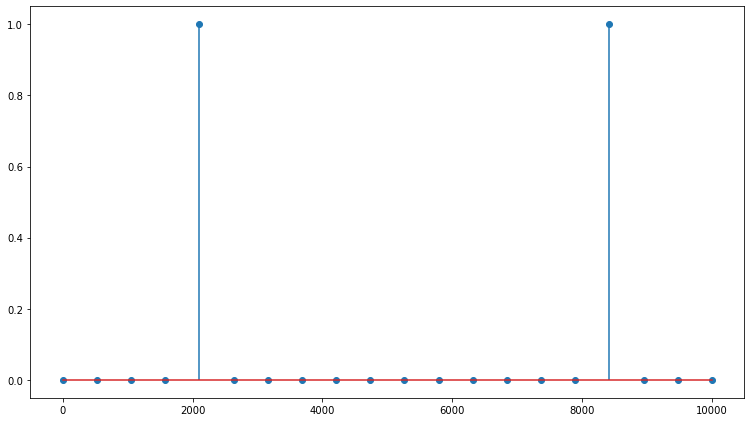

In [176]:
# x1原始序列dft频谱
X1k = dft(x1)
draw_dft_abs(X1k,fs)

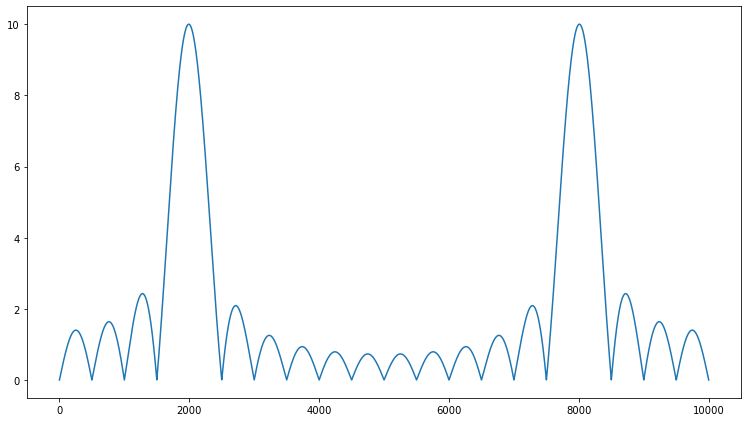

In [177]:
dtft_analysis(x1,fs)

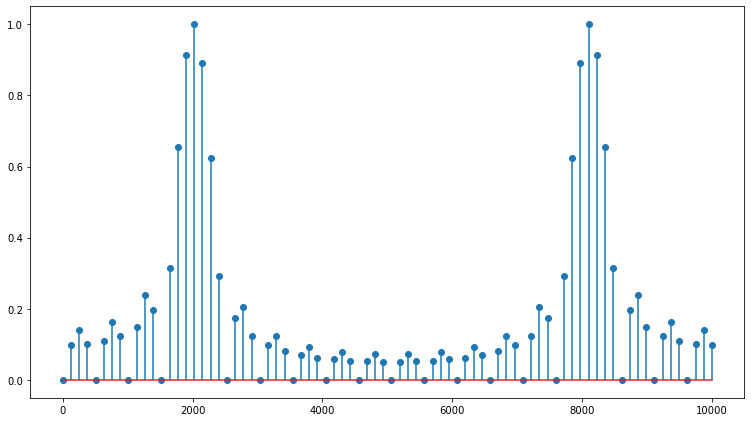

In [178]:
# x1扩展序列x10频谱
x10 = np.concatenate((x1,np.zeros(60,dtype='complex')))
X10k = dft(x10)
draw_dft_abs(X10k,fs)

<StemContainer object of 3 artists>

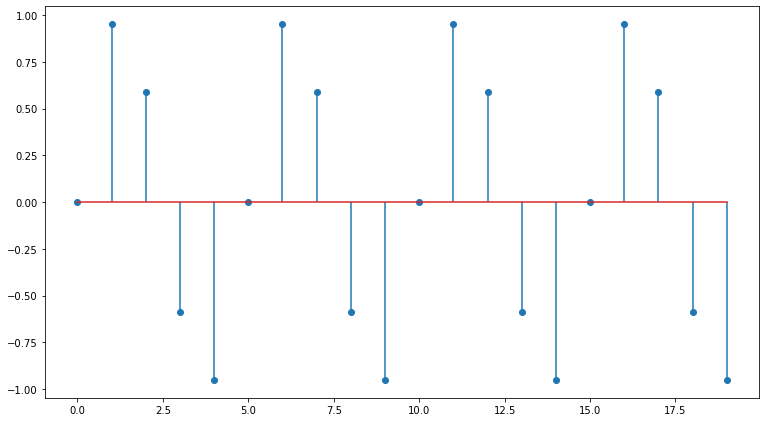

In [193]:
f0 = 2_000
fs = 500000

seq = np.arange(20)
x2 = np.sin(2*np.pi*f0*seq*(1/fs))
plt.stem(x1)

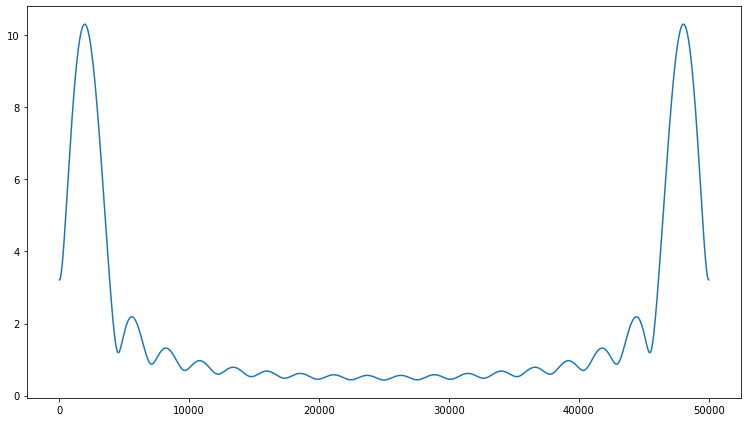

In [180]:
dtft_analysis(x2,fs)

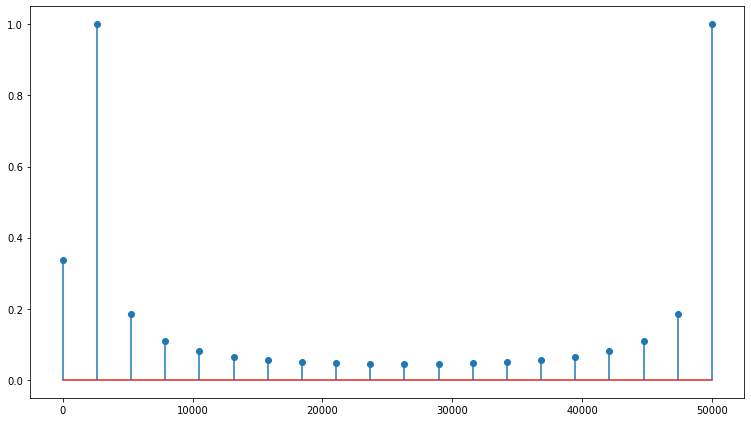

In [181]:
# x2原始序列dft频谱
X2k = dft(x2)
draw_dft_abs(X2k,fs)

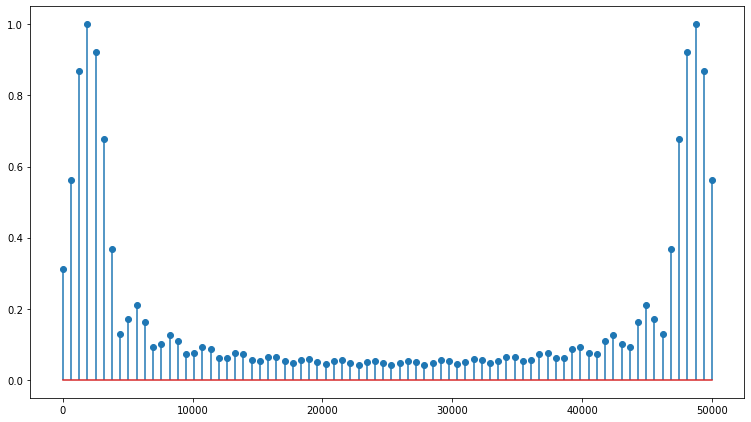

In [182]:
# x2扩展序列x20频谱
x20 = np.concatenate((x2,np.zeros(60,dtype='complex')))
X20k = dft(x20)
draw_dft_abs(X20k,fs)

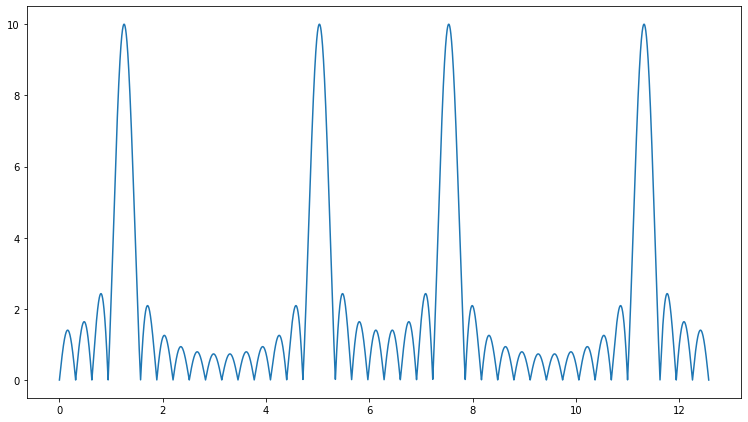

In [183]:
X1w = dtft(x1)
x_scale = np.linspace(0,4*np.pi,10000)
plt.plot(x_scale,np.abs(X1w(x_scale)))

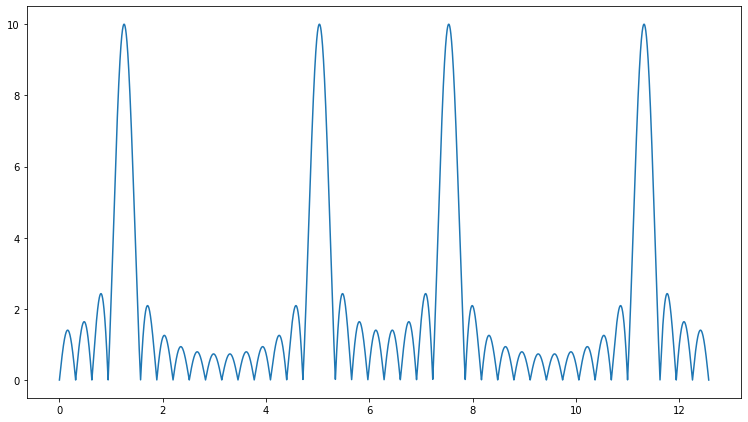

In [184]:
X10w = dtft(x10)
plt.plot(x_scale,np.abs(X10w(x_scale)))

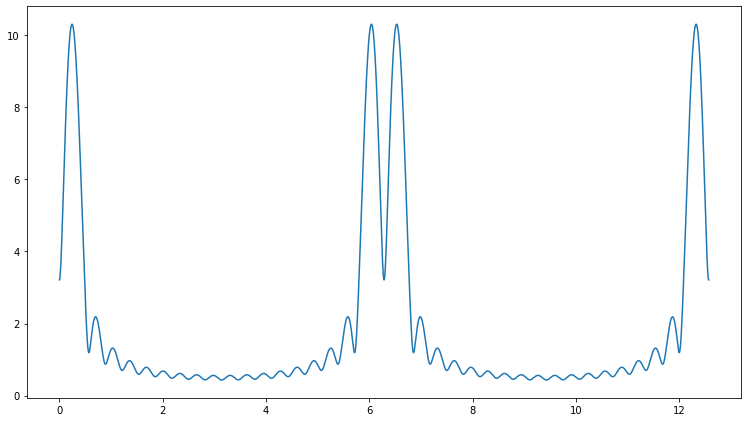

In [185]:
X2w = dtft(x2)
plt.plot(x_scale,np.abs(X2w(x_scale)))

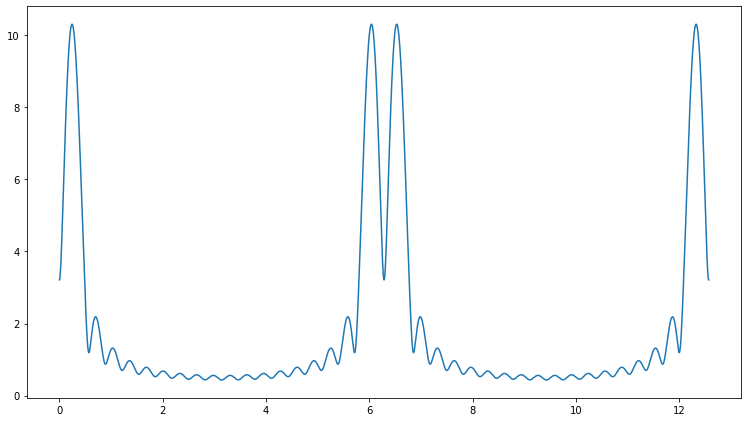

In [186]:
X20w = dtft(x20)
plt.plot(x_scale,np.abs(X20w(x_scale)))